In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
state = 'WB'

In [3]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [4]:
cases = c_data[state].resample('D').mean()#D,W,MS

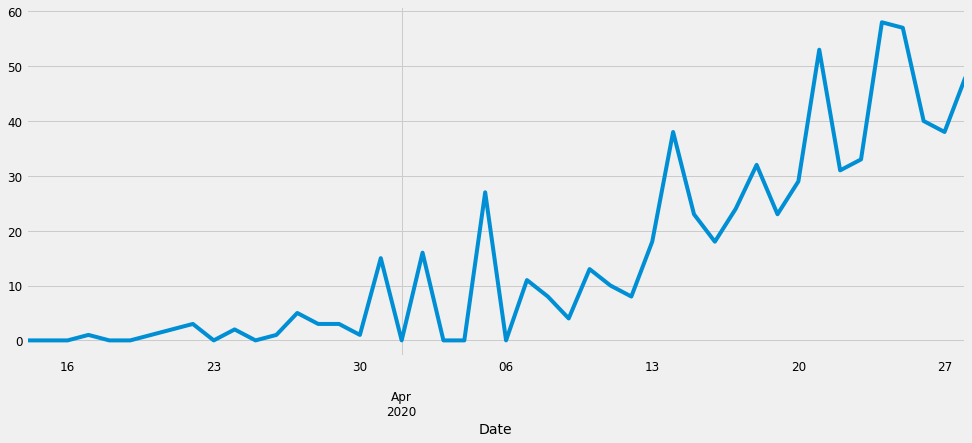

In [5]:
cases.plot(figsize=(15, 6))
plt.show()

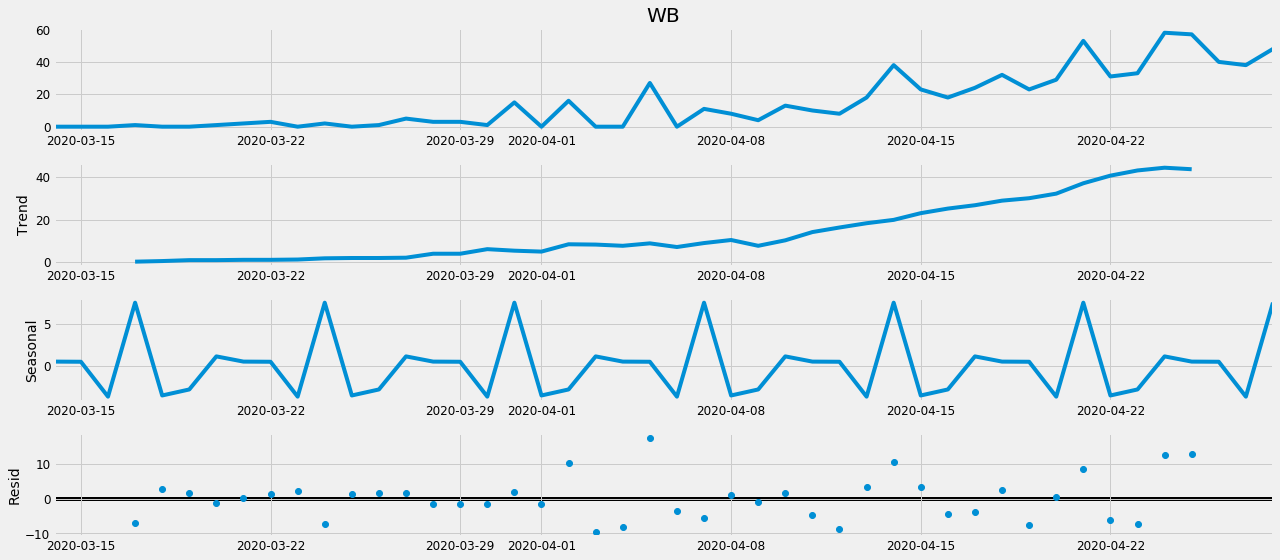

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:412.6748287341071


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1458.5903223694872
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:293.1626338645345
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:195.3493005774388
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:295.7925571069219


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1394.901486722895
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:202.6161548392194


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:196.40516284279155
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:371.0662657541919


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1440.5851150847332
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:276.50506522810247
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:179.1500004142957
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:292.25360654929113


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1393.0144298589826
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:193.8535852912308
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:180.29836475382191
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:341.09960221334813


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1301.6951019179864
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:276.37915369897877
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:168.93613335836685
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:267.4129794158263


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1415.5800550969761
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:173.25526801924732
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:164.38114010761421
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:319.390117382918
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2895.4029877498224
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:253.50936047645732
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:156.24011437497373
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:256.7024680385929
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2944.6497239098844
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:167.6606989649589
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:153.69213615929937
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:348.73198003709183


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1402.8281800601678
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:279.91594424334795
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:177.7100427741787
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:268.77705578207133


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1353.7341141771697
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:175.0394616656566
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:173.43773084139647
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:320.81317565256586


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1312.1875170389874
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:260.51189844861597
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:162.4946754451449
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:252.31848956937137


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1268.8627100090657
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:164.28029430405059
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:164.49167107548757
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:334.58946456792296


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:961.8257949743386
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:271.6318645739103
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:169.23303314756976
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:255.7741399417649


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1038.2777901890327
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:164.627189539437
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:163.62870980405643
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:320.87445163714995


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1147.1186434682234
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:255.16690095725585
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:158.23922033124097
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:251.49344443322397


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1040.806862777107
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:162.370316810449
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:155.61959227129938


In [9]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0085      0.495      0.017      0.986      -0.962       0.979
ma.L1         -0.7013      0.390     -1.798      0.072      -1.466       0.063
ma.S.L12      -1.0000   4.22e+04  -2.37e-05      1.000   -8.26e+04    8.26e+04
sigma2       111.0430   4.68e+06   2.37e-05      1.000   -9.18e+06    9.18e+06


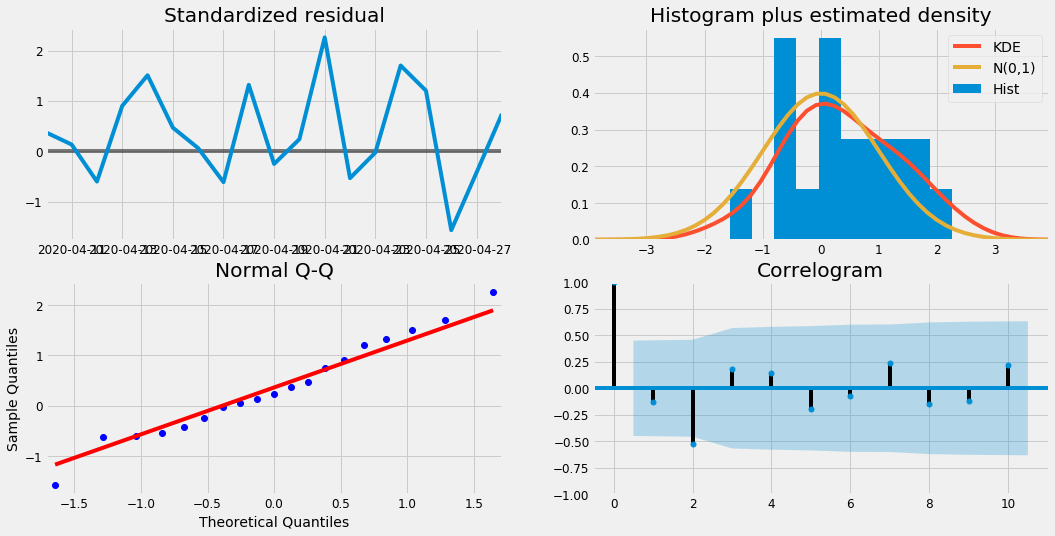

In [10]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

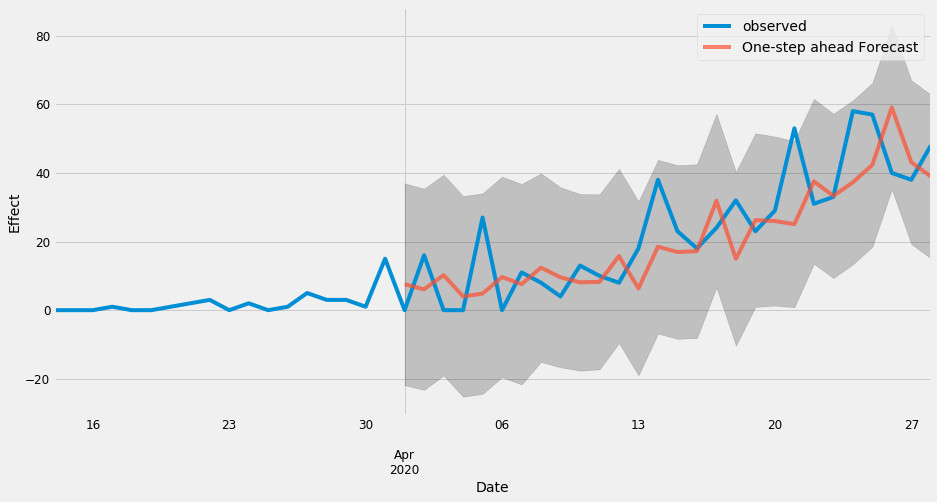

In [11]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [12]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 138.46


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 11.77


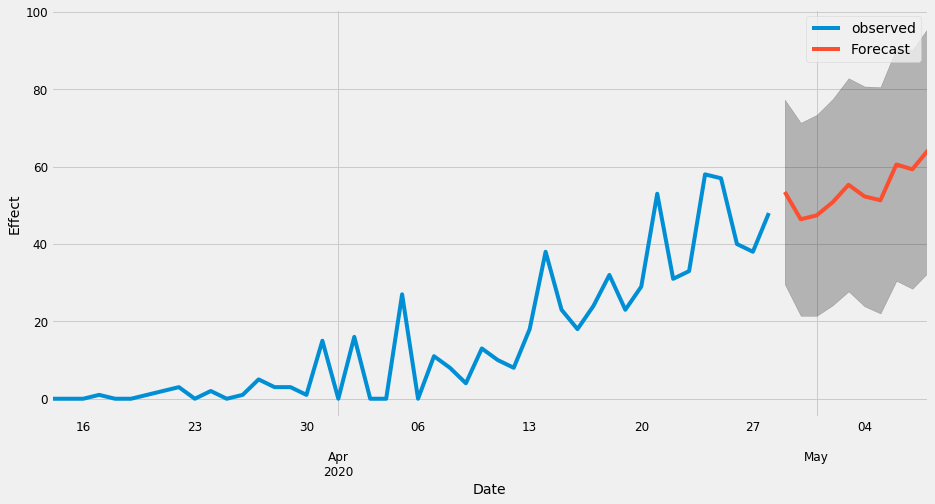

In [14]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [16]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [17]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,58,24
2020-04-25,57,0
2020-04-26,40,2
2020-04-27,38,0
2020-04-28,48,4


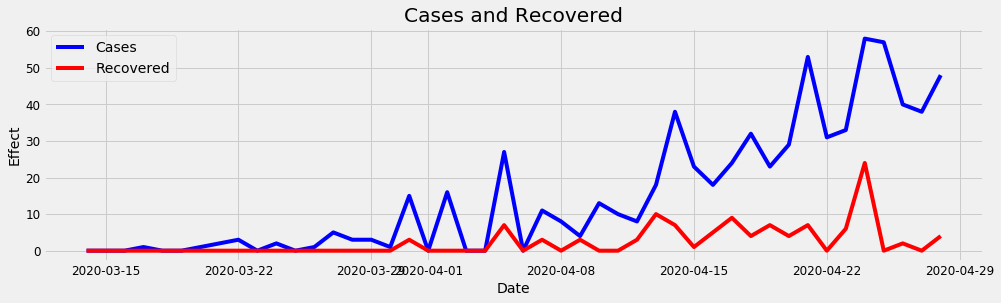

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [19]:
recovered = total_data['Recovered'].resample('D').mean()

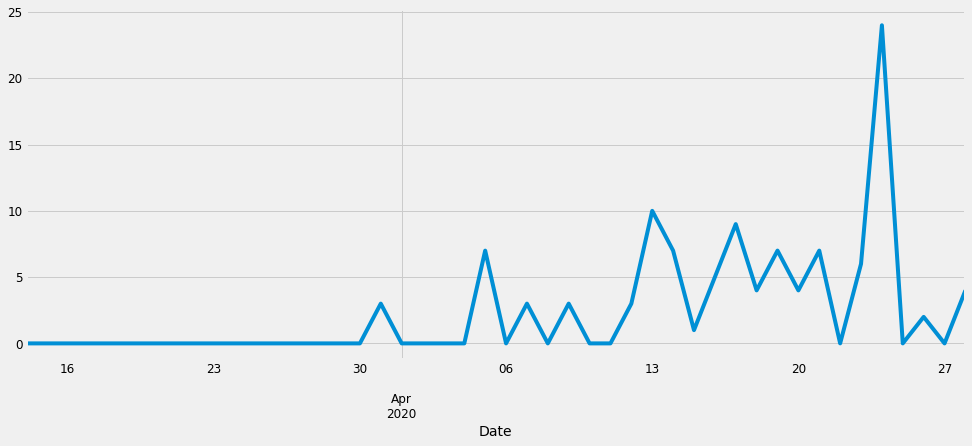

In [20]:
recovered.plot(figsize=(15, 6))
plt.show()

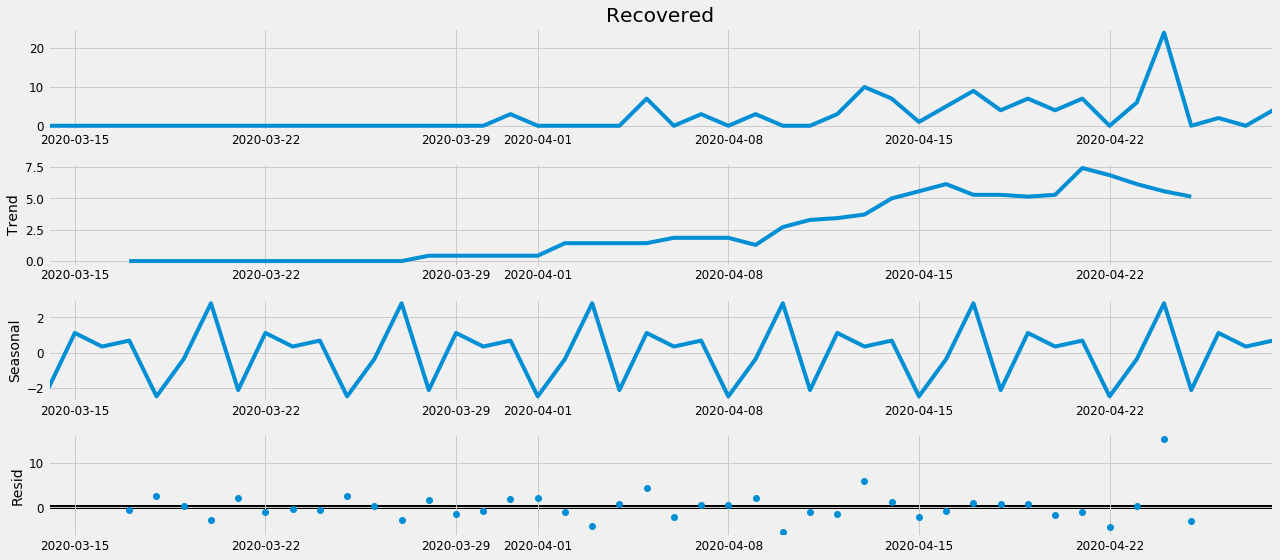

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:273.6651618350675
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1469.9697867718448


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:205.57695840175492
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:140.72928634494573
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:212.50351177968807


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1364.7893954864512
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:146.10826125254957
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:142.36850025695625
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:265.66115435677307


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1218.987915526042
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:201.8231229269011
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:136.10937993040602
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:213.43010067020526


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1209.8131846724489
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:146.26463340350404
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:137.05104659688584
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:277.4428478544728
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1416.9667195607008

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:218.09664638464778
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:142.80688702649488
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:220.07121758297743


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1645.8529144321221
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:143.9466819001591
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:139.96961546422818
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:249.13793656241097


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1279.3940689437059
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:194.81941245519866
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:126.68194403284917
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:202.94919052187834


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1299.2943735680578
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:134.75471030895596
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:125.35216630861495
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:268.4666078105581
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1456.1722679153427
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:207.01378211082027
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:141.47782245809816
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:208.1370898160365
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1446.6486261438517
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:139.78798508275466
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:141.67440756639303
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:256.2402806854365
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1414.2276537360908
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:203.669829576911
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:134.20276667500508
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:205.14517144703947
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1405.0532132304022
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:136.384330794490

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1464.4341091682206
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:213.4731056021359
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:141.0721682370448
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:209.45841392623686


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1472.2799114221627
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:136.17773590499527
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:137.8239848636786
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:250.9633532130161


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1359.9443744981263
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:196.8141727294085
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:128.66824641242042
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:199.78142645720797


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1367.779903707163
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:130.85921181201405
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:127.34323429421642


In [23]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0270      0.280     -0.096      0.923      -0.576       0.522
ma.L1         -1.0000   5791.275     -0.000      1.000   -1.14e+04    1.13e+04
ma.S.L12      -0.7859      3.031     -0.259      0.795      -6.726       5.155
sigma2        26.0533   1.51e+05      0.000      1.000   -2.96e+05    2.96e+05


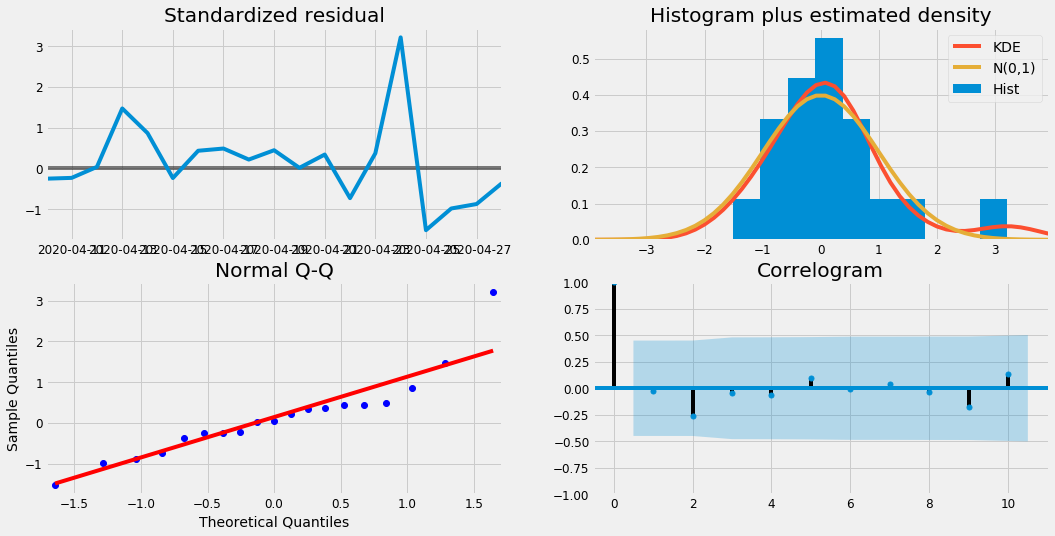

In [24]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

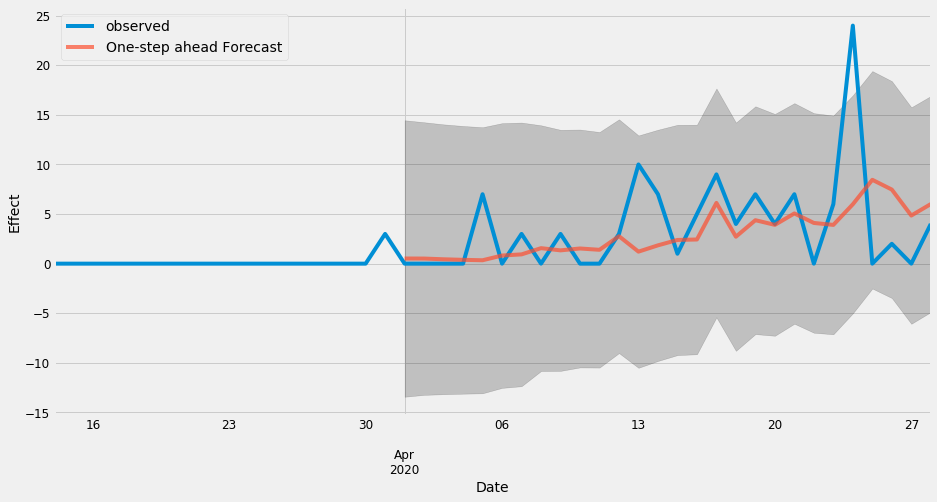

In [25]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [26]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 23.83


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 4.88


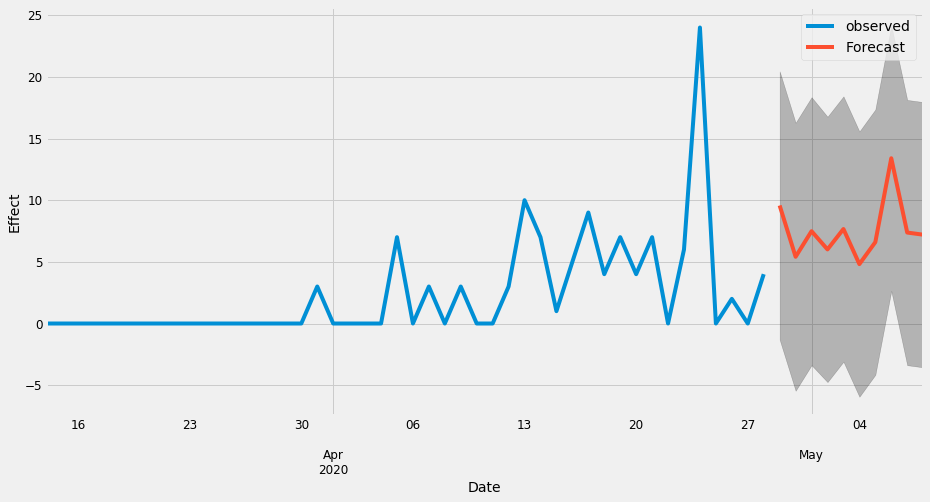

In [28]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

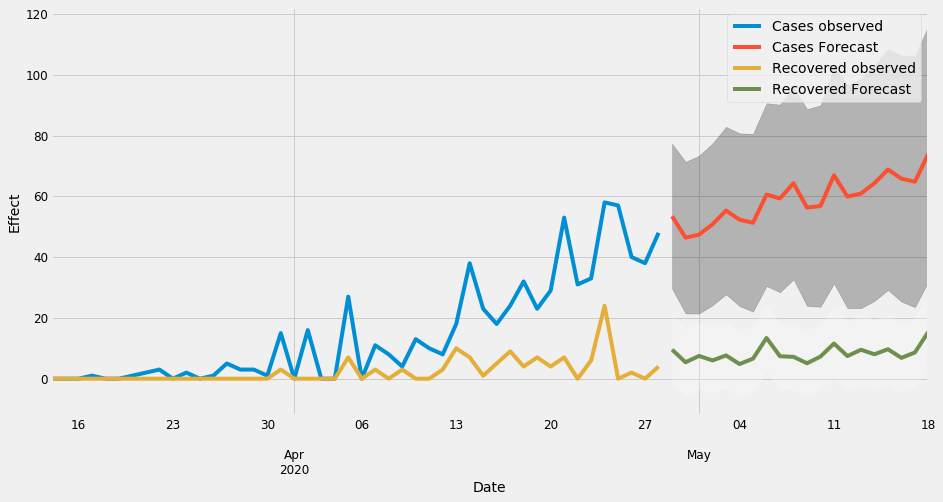

In [29]:
cases_pred_uc = cases_results.get_forecast(steps=20)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=20)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [31]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [32]:
int(np.mean(cases_result_date)[0])

104

In [33]:
int(min(cases_result_date[0]))

46

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-04-30


In [35]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [36]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-05-18


In [ ]:
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 9, 6

In [ ]:
sns.distplot(cases_result_date[0])
plt.show(block=True)

In [ ]:
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

In [ ]:
sns.distplot(cases_result_date[0],color='red')
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

In [ ]:
plt.bar([i for i in range(len(total_data['Cases']))], total_data['Cases'], align='center', alpha=0.5, color = 'black')
plt.bar([i for i in range(len(total_data['Recovered']))], total_data['Recovered'][0], align='center', alpha=0.5, color = 'blue')
plt.bar([i for i in range(len(cases_result_date))], cases_result_date[0], align='center', alpha=0.5, color = 'red')
plt.bar([i for i in range(len(recovered_result_date))], recovered_result_date[0], align='center', alpha=0.5, color='green')
plt.show()